# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%load_ext autoreload
%autoreload 2

# UV News Data Input

In [ ]:
import pandas as pd
import numpy as np

true_path = '/content/drive/MyDrive/AI_Final_Project/News_dataset/True.csv'
fake_path = '/content/drive/MyDrive/AI_Final_Project/News_dataset/Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [ ]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# Data Visulization

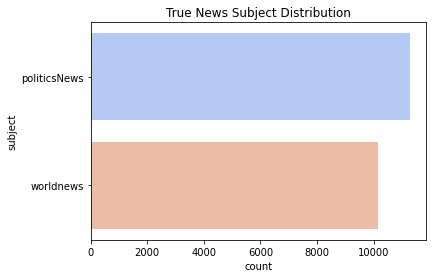

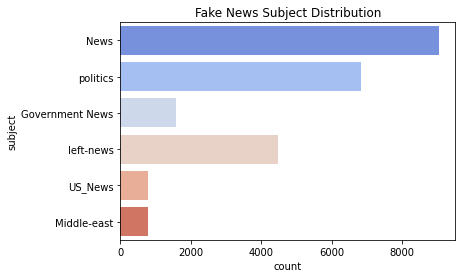

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

## Real News Word Cloud

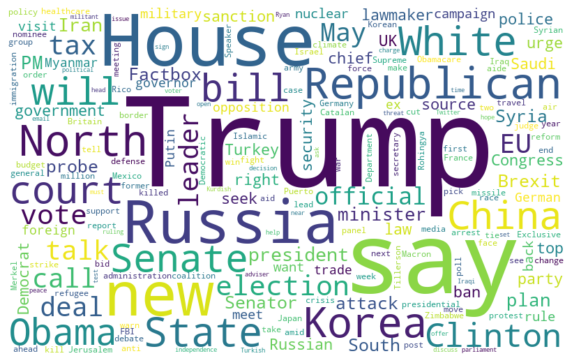

In [ ]:
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

## Fake News Word Cloud

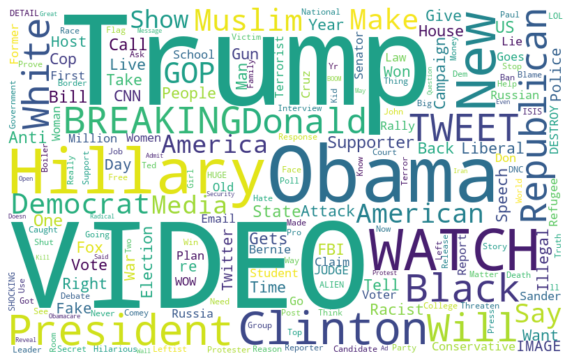

In [ ]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

## Data Combination

In [ ]:
# Add Labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Inspect Lengths of News

In [ ]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


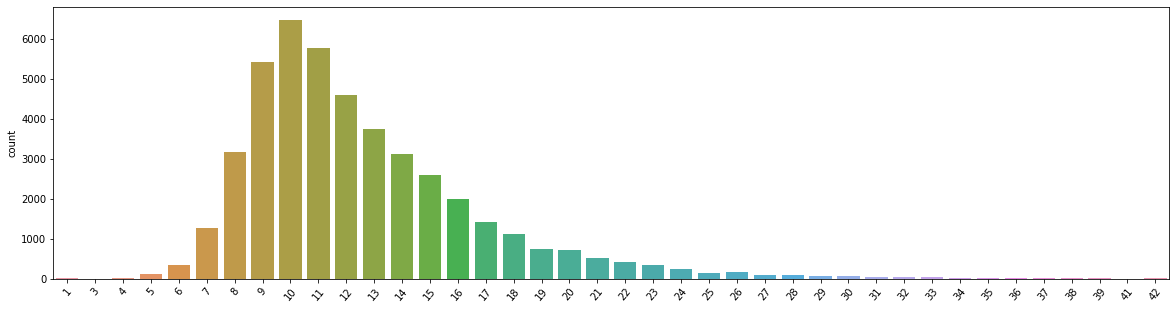

In [ ]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [ ]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## Purify & Shffle the DataFrame

In [ ]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Moscow says allegations about its influencing ...,1
1,Obama to deliver farewell address in Chicago o...,1
2,Sean Hannity Loses His Sh*t After Getting His...,0
3,YMCA Camp Forces Black Children Through Slave...,0
4,Trump sharpens 'rigged' election allegations d...,1
...,...,...
44893,South Dakota House fails to override veto of t...,1
44894,POLICE CALLED TO GRISLY MURDER SCENE: Find Dec...,0
44895,Democrat And Media Allies Attempts To Crush Bl...,0
44896,CHARLIE DANIELS SENDS A MESSAGE To Bruce Sprin...,0


## Split Data into Training, Validation, Test

In [ ]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## Data distribution imbalanced

In [ ]:
train_imbalanced = 1/10
val_imbalanced = 1/10
test_imbalanced = 1/10

train_true = train_df[train_df['true'] == 1]
train_fake = train_df[train_df['true'] == 0]
train_fake = train_fake.iloc[:round(len(train_fake)*train_imbalanced),:]
train_true_len = len(train_true)
train_fake_len = len(train_fake)
train_df = pd.concat([train_true, train_fake])
train_df = shuffle(train_df).reset_index(drop=True)

val_true = val_df[val_df['true'] == 1]
val_fake = val_df[val_df['true'] == 0]
val_fake = val_fake.iloc[:round(len(val_fake)*val_imbalanced),:]
val_true_len = len(val_true)
val_fake_len = len(val_fake)
val_df = pd.concat([val_true, val_fake])
val_df = shuffle(val_df).reset_index(drop=True)

test_true = test_df[test_df['true'] == 1]
test_fake = test_df[test_df['true'] == 0]
test_fake = test_fake.iloc[:round(len(test_fake)*test_imbalanced),:]
test_true_len = len(test_true)
test_fake_len = len(test_fake)
test_df = pd.concat([test_true, test_fake])
test_df = shuffle(test_df).reset_index(drop=True)

len_df = pd.DataFrame({'ind': ['Train', 'Validation', 'Test'], 'True': [train_true_len, val_true_len, test_true_len], 'Fake': [train_fake_len, val_fake_len, test_fake_len]})
len_df.set_index('ind', inplace=True)
len_df.index.name = None

len_df

,True,Fake
Train,13726,1501
Validation,3425,376
Test,4266,471


## Dataframe to csv

In [ ]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [ ]:
df = pd.concat([train_df, val_df, test_df])
df

,title,true
0,Trump tightens grip on U.S. Republican nomination,1
1,Putin: Russia reserves right to cut further U....,1
2,BUSTED! STATE OFFICIALS Bust Voter Fraudsters ...,0
3,Pentagon says fourth U.S. soldier killed in Ni...,1
4,Lebanon's Hariri signals may withdraw resignat...,1
...,...,...
4732,"Senate confirms two FERC commissioners, restor...",1
4733,CNN’s Don Lemon Tries to Downplay Horrific ‘An...,0
4734,More than 20 Islamic State militants killed in...,1
4735,"Trapped by landmines and a creek, Rohingya lan...",1


## Performing Data Cleaning

In [ ]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

## Obtaining The Total Words Present In The Dataset

In [ ]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

14117

## Preparing The Data By Performing Tokenization And Padding

In [ ]:
from nltk import word_tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# LSTM

## Building And Training LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            564680    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 621,181
Trainable params: 621,181
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
238/238 [==============================] - 6s 14ms/step - loss: 0.1652 - accuracy: 0.9485 - val_loss: 0.0792 - val_accuracy: 0.9726
Epoch 2/3
238/238 [==============================] - 3s 12ms/step - loss: 0.0439 - accuracy: 0.9873 - val_loss: 0.0917 - val_accuracy: 0.9732
Epoch 3/3
238/238 [==============================] - 3s 12ms/step - loss: 0.0166 - accuracy: 0.9959 - val_loss: 0.1134 - val_accuracy: 0.9761


## Assessing Trained Model Performance

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


LSTM Model Accuracy :  0.978045176271902
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       471
           1       0.98      0.99      0.99      4266

    accuracy                           0.98      4737
   macro avg       0.95      0.93      0.94      4737
weighted avg       0.98      0.98      0.98      4737



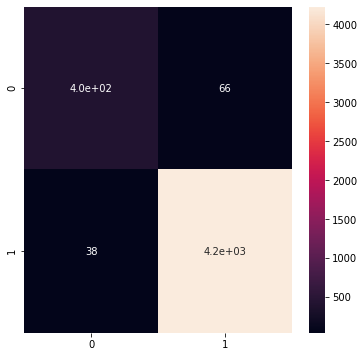

In [ ]:
# Making prediction
prediction = model.predict_classes(padded_test)

# Getting The Accuracy
from sklearn.metrics import accuracy_score
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

# Bidirectional LSTM

## Building And Training Bidirectional LSTM Model

In [ ]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            564680    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 677,681
Trainable params: 677,681
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
238/238 [==============================] - 7s 18ms/step - loss: 0.1651 - accuracy: 0.9488 - val_loss: 0.0750 - val_accuracy: 0.9758
Epoch 2/3
238/238 [==============================] - 4s 15ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0841 - val_accuracy: 0.9774
Epoch 3/3
238/238 [==============================] - 4s 15ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0793 - val_accuracy: 0.9795


## Assessing Trained Model Performance

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Bidirectional LSTM Model Accuracy :  0.9799451129406798
              precision    recall  f1-score   support

           0       0.94      0.86      0.89       471
           1       0.98      0.99      0.99      4266

    accuracy                           0.98      4737
   macro avg       0.96      0.93      0.94      4737
weighted avg       0.98      0.98      0.98      4737



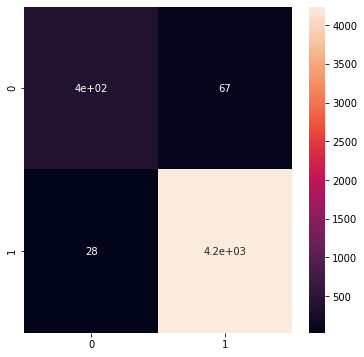

In [ ]:
# Making prediction
prediction = model.predict_classes(padded_test)

# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("Bidirectional LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))

# CNN-BiLSTM

## Building And Training CNN Model

In [ ]:
## Creating model Using CNN
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=20))

model.add(Dropout(0.3))

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            564680    
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 32)            6432      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 32)             5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)              

In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
238/238 [==============================] - 13s 16ms/step - loss: 0.1649 - accuracy: 0.9478 - val_loss: 0.0909 - val_accuracy: 0.9737
Epoch 2/3
238/238 [==============================] - 3s 13ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0783 - val_accuracy: 0.9792
Epoch 3/3
238/238 [==============================] - 3s 13ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0812 - val_accuracy: 0.9784


## Assessing Trained Model Performance

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


CNN Model Accuracy :  0.9791006966434452
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       471
           1       0.98      1.00      0.99      4266

    accuracy                           0.98      4737
   macro avg       0.97      0.91      0.94      4737
weighted avg       0.98      0.98      0.98      4737



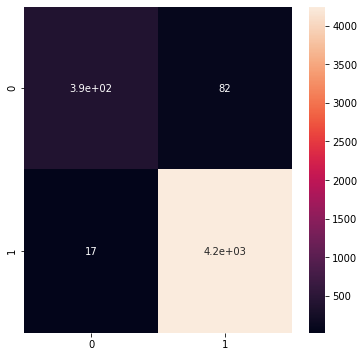

In [ ]:
# Making prediction
prediction = model.predict_classes(padded_test)

# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("CNN Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))

# BERT

In [ ]:
!pip install transformers

import torch
from transformers import BertTokenizer

In [ ]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

## Load Dataset Class

In [ ]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    # 定義回傳一筆訓練 / 測試數據的函式
    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
            
        # 建立第一個句子的 BERT tokens 並加入分隔符號 [SEP]
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        
#         # 第二個句子的 BERT tokens
#         tokens_b = self.tokenizer.tokenize(text_b)
#         word_pieces += tokens_b + ["[SEP]"]
#         len_b = len(word_pieces) - len_a
        
        # 將整個 token 序列轉換成索引序列
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # 將第一句包含 [SEP] 的 token 位置設為 0
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 15227
valset size: 3801
testset size:  4737


## Sampling and Observing Tensors

In [ ]:
# 選擇第一個樣本
sample_idx = 0

# 將原始文本拿出做比較
statement, label = trainset.df.iloc[sample_idx].values

# 利用剛剛建立的 Dataset 取出轉換後的 id tensors
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

# 將 tokens_tensor 還原成文本
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

# 渲染前後差異，毫無反應就是個 print。可以直接看輸出結果
print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
Trump tightens grip on U.S. Republican nomination

tokens: 
['[CLS]', 'trump', 'tighten', '##s', 'grip', 'on', 'u', '.', 's', '.', 'republican', 'nomination', '[SEP]']

label: 1

--------------------

tokens_tensor: 
tensor([  101,  8398, 21245,  2015,  6218,  2006,  1057,  1012,  1055,  1012,
         3951,  6488,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
1




## Reforming the Dataset to Fit the Model

In [ ]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# 這個函式的輸入 `samples` 是一個 list，裡頭的每個 element 都是
# 剛剛定義的 `FakeNewsDataset` 回傳的一個樣本，每個樣本都包含 3 tensors：
# - tokens_tensor
# - segments_tensor
# - label_tensor
# 它會對前兩個 tensors 作 zero padding，並產生前面說明過的 masks_tensors
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # 測試集有 labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    
    # attention masks，將 tokens_tensors 裡頭不為 zero padding
    # 的位置設為 1 讓 BERT 只關注這些位置的 tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


# 初始化一個每次回傳 16 個訓練樣本的 DataLoader
# 利用 `collate_fn` 將 list of samples 合併成一個 mini-batch 是關鍵
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [ ]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 21]) 
tensor([[  101,  8398, 21245,  2015,  6218,  2006,  1057,  1012,  1055,  1012,
          3951,  6488,   102,     0,     0,     0,     0,     0,     0,     0,
             0],
        [  101, 22072,  1024,  3607,  8269,  2157,  2000,  3013,  2582,  1057,
          1012,  1055,  1012,  8041,  3260,   102,     0,     0,     0,     0,
             0],
        [  101, 23142,   999,  2110,  4584, 13950, 14303,  9861, 15608,  1999,
          3572,  2408,  2637,  1529, 14451,  2015,  6206,  5829,  2011,  3667,
           102],
        [  101, 20864,  2758,  2959,  1057,  1012,  1055,  1012,  5268,  2730,
          1999, 16842, 15283,   102,     0,     0,     0,     0,     0,     0,
             0],
        [  101,  8341,  1005,  1055, 21291,  3089,  7755,  2089, 10632,  8172,
          2279,  2733,  1024,  4861,   102,     0,     0,     0,     0,     0,
             0],
        [  101,  5924,  2343,  1024,  8818,  2000,  2131,  6211,  2004,  3864

## Model Construction

In [ ]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

# high-level 顯示此模型裡的 modules
print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [ ]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.7.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

## Fine-Tuning of BERT

In [ ]:
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        # 將參數梯度歸零
        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        # 紀錄當前 batch loss
        train_loss += loss.item()

        # if batch_idx == len(trainloader)-1:
        #     _, acc = get_predictions(model, trainloader, compute_acc=True)

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

device: cuda:0


## Save Model

In [ ]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


## Load Model

In [ ]:
# model = torch.load('./best_model.pth')
# model = model.to(device)

## Test

[[0.99530516 0.05450734]
 [0.00469484 0.94549266]]
Acc:  0.9902892125818028


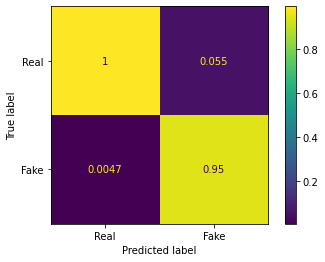

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [ ]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['title']], 
                          testset.df.loc[:, ['true']], 
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,title,true,pred_label
0,U.S. tax cuts won't make housing more affordab...,1,1
1,U.S. Attorney General Sessions hires private a...,1,1
2,"Bernie Sanders-style, grassroots effort a like...",1,1
3,"Sanders praises Obama, Biden for impartiality,...",1,1
4,OBAMA REGIME Uses Image Of U.S. Constitution I...,0,0
...,...,...,...
4732,"Senate confirms two FERC commissioners, restor...",1,1
4733,CNN’s Don Lemon Tries to Downplay Horrific ‘An...,0,0
4734,More than 20 Islamic State militants killed in...,1,1
4735,"Trapped by landmines and a creek, Rohingya lan...",1,1


In [ ]:
print(classification_report(df_pred.true, df_pred.pred_label))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       471
           1       1.00      0.99      0.99      4266

    accuracy                           0.99      4737
   macro avg       0.97      0.98      0.97      4737
weighted avg       0.99      0.99      0.99      4737



## Insight on Wrong Classification

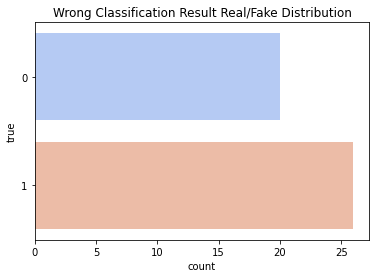

In [ ]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [ ]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].title.values
wrong_titles

array([' The Hidden Root Of White Rage',
       'Democrats want to grill Wells Fargo executives about auto insurance',
       'Top executive behind Dakota Access has donated more than $100,000 to Trump',
       'Exclusive: Trump targets illegal immigrants who were given reprieves from deportation by Obama',
       ' Trump Tries To MANIPULATE Nevada Vote And Gets Shut Down HARD',
       ' In White House Conference Call About Iran, Staffers Talked About Blowup Dolls',
       "What do I need to know about the CIA's hacking program?",
       'The Big Squeeze: This election year, it’s all about the money',
       'Got bank? Election could create flood of marijuana cash with no place to go',
       'Trump gives Boy Scouts at jamboree a taste of Washington politics',
       'Palin vows to help defeat Ryan over his refusal to support Trump',
       'Trump unshackled: President defends Charlottesville response at raucous rally',
       ' Anti-Gay Alabama Chief Justice Roy Moore To Stand Trial F

# ALBERT

In [1]:
!pip install transformers

import torch
from transformers import AlbertTokenizer

     |████████████████████████████████| 2.5MB 26.8MB/s 
     |████████████████████████████████| 901kB 33.9MB/s 
     |████████████████████████████████| 3.3MB 40.2MB/s 


In [5]:
PRETRAINED_MODEL_NAME = 'albert-base-v2'
tokenizer = AlbertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

ImportError: ignored